In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepearing and plotting exemplary dataset

In [88]:
N=5000 # N-number of d-dimensional vectors
d=9 # d-dimension
r = np.random.randn(N,d)
df=pd.DataFrame(r,columns=['x'+str(i+1) for i in range(0,d)])
df.iloc[3000::,4::]=df.iloc[3000::,4::]+5 #some modification
df.iloc[:2000,:3]=df.iloc[:2000,:3]-5
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-4.610950,-4.258733,-6.096318,1.880858,0.437387,0.493730,0.847710,-0.048355,0.971172
1,-6.487637,-4.250559,-5.221005,0.162830,-0.381749,-1.198763,1.604774,0.686690,0.317322
2,-4.935696,-3.619285,-5.906105,-1.219467,-1.628318,-0.600871,-0.468047,1.747220,0.416343
3,-5.683953,-5.197404,-4.142895,0.689221,0.998562,-0.147873,-0.214559,0.499247,1.119548
4,-7.065849,-4.452068,-4.576489,-0.207499,-0.337341,-0.831105,1.537189,0.672453,0.548696
...,...,...,...,...,...,...,...,...,...
4995,1.992702,-0.084983,-1.695323,0.537156,4.601425,6.183524,5.244449,4.662085,6.431630
4996,-0.229925,0.696184,-1.878444,-1.983987,6.193500,4.528467,3.779550,4.055688,3.070317
4997,-2.043524,0.729063,0.008480,1.463860,6.042459,4.691469,5.498036,5.270427,5.772408
4998,0.082195,0.469885,-1.121875,0.631281,6.580625,4.519802,6.415128,5.134730,4.336446


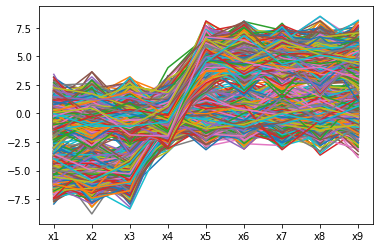

In [89]:
plt.plot(df.T)
plt.show()

# Multidimensional histogram

## Computing histogram

In [90]:
H, edges=np.histogramdd(r, bins = (2,2,2,1,2,2,2,2,2))

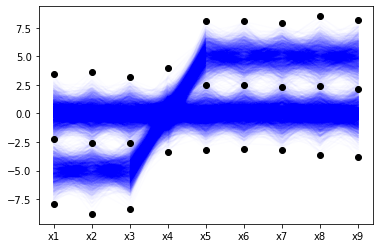

In [91]:
#Plotting bins
plt.plot(df.T,'blue',alpha=0.01)
plt.plot(pd.DataFrame(edges),'ko')
plt.show()

## Plotting regions

Data are grouped in 3 groups: 38%, 37%, 18%. Rest of trajectories are not concentrated in at least 10% groups.


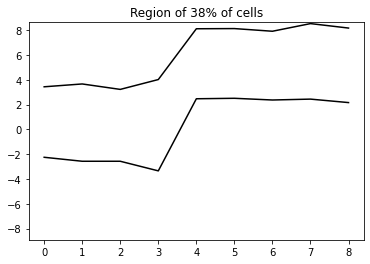

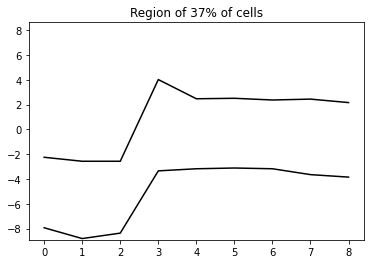

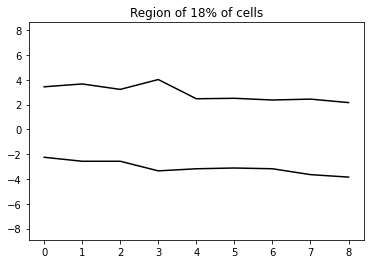

In [92]:
eps=10
H=100*H/N
m=np.transpose(np.array(np.where(H>eps)))
H_eps=H[H>eps]
m=m[[np.where(H_eps==i)[0][0] for i in np.sort(H_eps)[::-1]]]
H_eps=np.sort(H_eps)[::-1]
if len(m)>0:
    print(f'Data are grouped in {len(m)} groups: '+', '.join(str(int(i))+'%' for i in H_eps)+f'. Rest of trajectories are not concentrated in at least {eps}% groups.')
    for i, val in enumerate(m):
        y1=[edges[i][j] for i,j in zip(range(0,d),val)]
        y2=[edges[i][j+1] for i,j in zip(range(0,d),val)]
        plt.plot(y1,'k')
        plt.plot(y2,'k')
        plt.ylim([np.min(r)-0.1,np.max(r)+0.1])
        plt.title(label=f'Region of {int(H_eps[i])}% of cells')
        plt.show()
else:
        print(f'There are no classes with at least {eps}% of cells. Try to lower number of bins.')

# Functions testing

In [107]:
from Visualizations.histogramd import histogram_d

ModuleNotFoundError: No module named 'Visualizations'

Data are grouped in 6 groups: 30%, 22%, 16%, 11%, 8%, 7%. Rest of vectors (4%) are not concentrated in at least 5% groups.


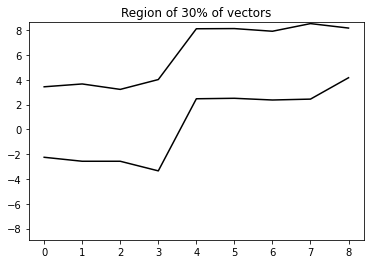

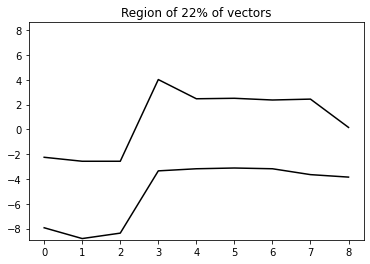

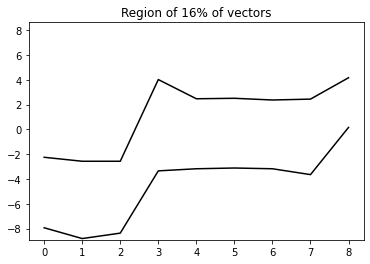

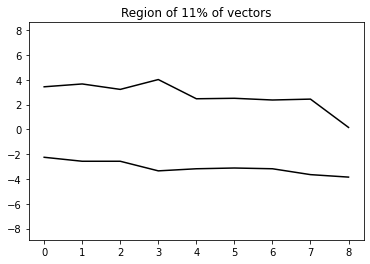

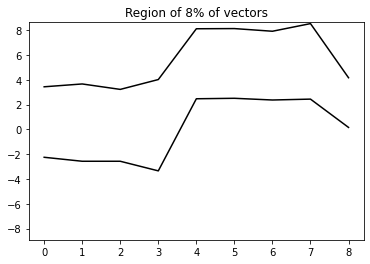

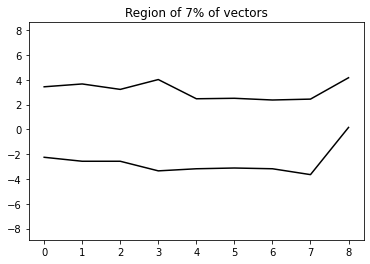

In [103]:
histogram_d(df, (2,2,2,1,2,2,2,2,3), 5)